The aim of this project was to develop machine learning models to predict the presence of heart disease in patients based on various medical indicators.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Preparation of the dataset for model training. Let's convert categorical variables to digital values ​​using pd.get_dummies.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
selected_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
data1 = pd.get_dummies(data, columns=selected_columns)

In [ ]:
data1.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    uint8  
 8   Sex_M              918 non-null    uint8  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ExerciseAngina_N   918 non

Let's split the sample into a training and test subset. We leave 80% of the data for the training set and 20% for the test set.

In [ ]:
X = data1[['Age',	'RestingBP',	'Cholesterol',	'FastingBS',	'MaxHR',	'Oldpeak',	'Sex_F',	'Sex_M',	'ChestPainType_ASY',	'ChestPainType_ATA',	'ChestPainType_NAP',	'ChestPainType_TA',	'RestingECG_LVH',	'RestingECG_Normal',	'RestingECG_ST',	'ExerciseAngina_N',	'ExerciseAngina_Y',	'ST_Slope_Down',	'ST_Slope_Flat',	'ST_Slope_Up']]

In [ ]:
y = data1['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's train a decision tree on the training set. I will use tree.DecisionTreeClassifier and ensemble.RandomForestClassifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(random_state=10)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [ ]:
clf_rf = RandomForestClassifier(random_state=10)

In [ ]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

For the test set, we will make a prediction of the target variable. Let's use metrics.classification_report to display metrics for each model created.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred_clf = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76        77
           1       0.85      0.76      0.80       107

    accuracy                           0.78       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.79      0.78      0.78       184



In [ ]:
y_pred_rf = clf_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



Let us display the importance of the features obtained after training the model in the form of a bar chart and sort the importance in descending order.

In [ ]:
imp = pd.Series(clf_rf.feature_importances_)

In [ ]:
imp.index = pd.Series(X_train.columns)

In [ ]:
imp = imp.sort_values(ascending=False)
imp

ST_Slope_Up          0.155740
Oldpeak              0.103577
MaxHR                0.099602
ST_Slope_Flat        0.086708
Cholesterol          0.085291
Age                  0.083751
ExerciseAngina_N     0.066370
RestingBP            0.064359
ChestPainType_ASY    0.060444
ExerciseAngina_Y     0.049291
Sex_F                0.024956
Sex_M                0.021494
FastingBS            0.019929
ChestPainType_ATA    0.019890
ChestPainType_NAP    0.013793
RestingECG_LVH       0.012504
RestingECG_Normal    0.011507
RestingECG_ST        0.008069
ST_Slope_Down        0.007477
ChestPainType_TA     0.005249
dtype: float64

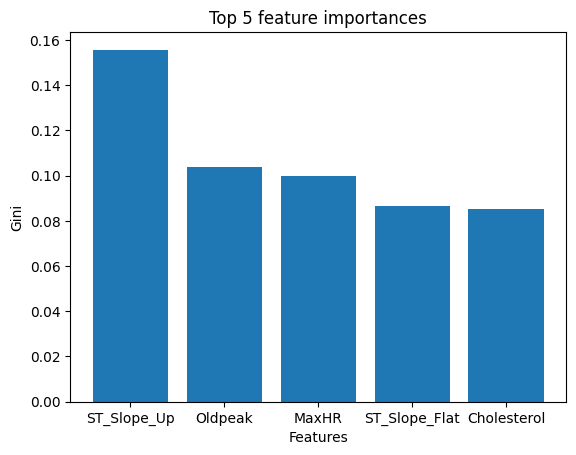

In [ ]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head().index, imp.head())
plt.show()

We will use ensemble.BaggingClassifier to train the model tree.DecisionTreeClassifier and again predict the target variables and output metrics.

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=10),
                           n_estimators=10,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=10)

In [ ]:
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=10),
                  max_features=0.5, max_samples=0.5, random_state=10)

In [ ]:
y_pred_bagging = bagging.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_bagging))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        77
           1       0.90      0.78      0.83       107

    accuracy                           0.82       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.82      0.82       184



We will use ensemble.StackingClassifier to train tree.DecisionTreeClassifier, ensemble.RandomForestClassifier and svm.LinearSVC and again predict the target variables and output metrics.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = [
    ('decision_tree', DecisionTreeClassifier(random_state=10)),
    ('random_forest', RandomForestClassifier(random_state=10)),
    ('linear_svc', LinearSVC())
]

In [ ]:
meta_classifier = DecisionTreeClassifier(random_state=10)

In [ ]:
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=meta_classifier)

In [ ]:
stacking_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

StackingClassifier(estimators=[('decision_tree',
                                DecisionTreeClassifier(random_state=10)),
                               ('random_forest',
                                RandomForestClassifier(random_state=10)),
                               ('linear_svc', LinearSVC())],
                   final_estimator=DecisionTreeClassifier(random_state=10))

In [ ]:
y_pred_stacking = stacking_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_stacking))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        77
           1       0.89      0.76      0.82       107

    accuracy                           0.80       184
   macro avg       0.81      0.81      0.80       184
weighted avg       0.82      0.80      0.81       184



We can conclude that RandomForest has the best metrics, followed by Bagging and then Stacking. All quality metrics do not reach 90, which means that the models are not overtrained.